# Data Preparation

In [35]:
import os
notebook_file_path = os.path.dirname(os.path.abspath("__file__"))

In [36]:
notebook_file_path

'c:\\Users\\97433\\EmailSummarizer\\ModelDevelopment'

In [46]:
import sys
platform_type = "windows" if "win" in sys.platform else "unix"
platform_type

'windows'

# Standard Pre-processing steps

In [47]:
import pandas as pd
final_email_dataset_csv = os.path.join(notebook_file_path, r"Data\final_email_dataset.csv") if platform_type == "windows" else os.path.join(notebook_file_path, r"Data/final_email_dataset.csv")
merged_df = pd.read_csv(final_email_dataset_csv)
merged_df.head()

,thread_id,subject,timestamp,from,to,body,summary
0,1,FW: Master Termination Log,1012303422000,"Gossett, Jeffrey C. JGOSSET","['Giron', 'Darron C. Dgiron', 'Love', 'Phillip...",\n\n -----Original Message-----\nFrom: =09Ther...,The email thread discusses the Master Terminat...
1,1,FW: Master Termination Log,1012481400000,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Gossett', 'Jeff...",\n\n -----Original Message-----\nFrom: =09Panu...,The email thread discusses the Master Terminat...
2,1,FW: Master Termination Log,1012921415000,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Anderson', 'Dia...",Note to Stephanie Panus....\n\nStephanie...ple...,The email thread discusses the Master Terminat...
3,1,FW: Master Termination Log,1012921585000,"Theriot, Kim S. KTHERIO","['Hall', 'D. Todd Thall', 'Sweeney', 'Kevin Ks...",\n\n -----Original Message-----\nFrom: =09Panu...,The email thread discusses the Master Terminat...
4,1,FW: Master Termination Log,1022570435000,"Kelly, Katherine L. KKELLY","['Germany', 'Chris Cgerman']",\n\n -----Original Message-----\nFrom: =09McMi...,The email thread discusses the Master Terminat...


In [42]:
import string
import re

def remove_special_chars(text):
    punctuations = string.punctuation
    
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    return text.translate(str.maketrans('', '', punctuations))


In [43]:
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    text = text.replace("\n", " ")
    text = ' '.join([word for word in text.split(' ') if word not in eng_stopwords])
    return text


In [7]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_words(text):
    return "".join([ps.stem(word) for word in text])

In [8]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spellings(text):
    """
    Correct misspelled words in the input text.
    
    Args:
        text (str): The input text to be corrected.
    
    Returns:
        str: The corrected text.
    """
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    
    for word in text.split():
        if word in misspelled_words:
            correction = spell.correction(word)
            corrected_text.append(correction if correction else word)  # Use original word if no suggestion
        else:
            corrected_text.append(word)
    
    return ' '.join(corrected_text)

In [9]:
from collections import Counter

def remove_frequent_words(tokens, cutoff = 30):

    word_counts = Counter(tokens)
    common_words_and_count = word_counts.most_common(cutoff)
    most_common_words = [entry[0] for entry in common_words_and_count]
    
    def filter_func(word):
        word = word.strip()
        ans =  word not in most_common_words
        return ans

    filtered_words = list(filter(filter_func, tokens))
    return filtered_words

# Exploratory Data Analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import re

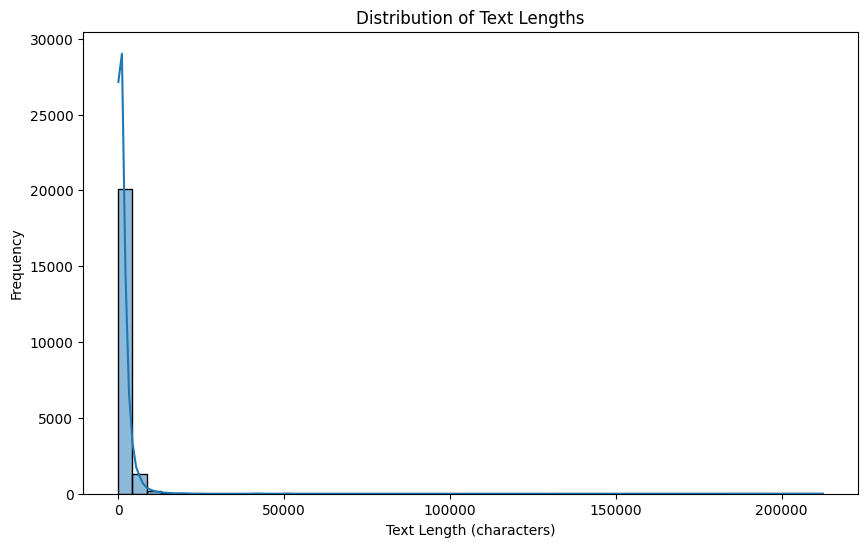

In [11]:
# Add a column for text lengths (e.g., number of characters)
merged_df['text_length'] = merged_df['body'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [12]:
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")  # Replace with your desired model's tokenizer

# Tokenize the text using the auto tokenizer
merged_df['body_tokens'] = merged_df['body'].apply(lambda x: tokenizer.tokenize(x))
merged_df['summary_tokens'] = merged_df['summary'].apply(lambda x: tokenizer.tokenize(x))
merged_df['subject_tokens'] = merged_df['subject'].apply(lambda x: tokenizer.tokenize(x))

# Flatten the token list and count unique tokens
all_tokens = [token for tokens in merged_df['body_tokens'] for token in tokens]
unique_tokens = set(all_tokens)

print(f"Vocabulary Size: {len(unique_tokens)}")


c:\Users\97433\EmailSummarizer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Vocabulary Size: 36355


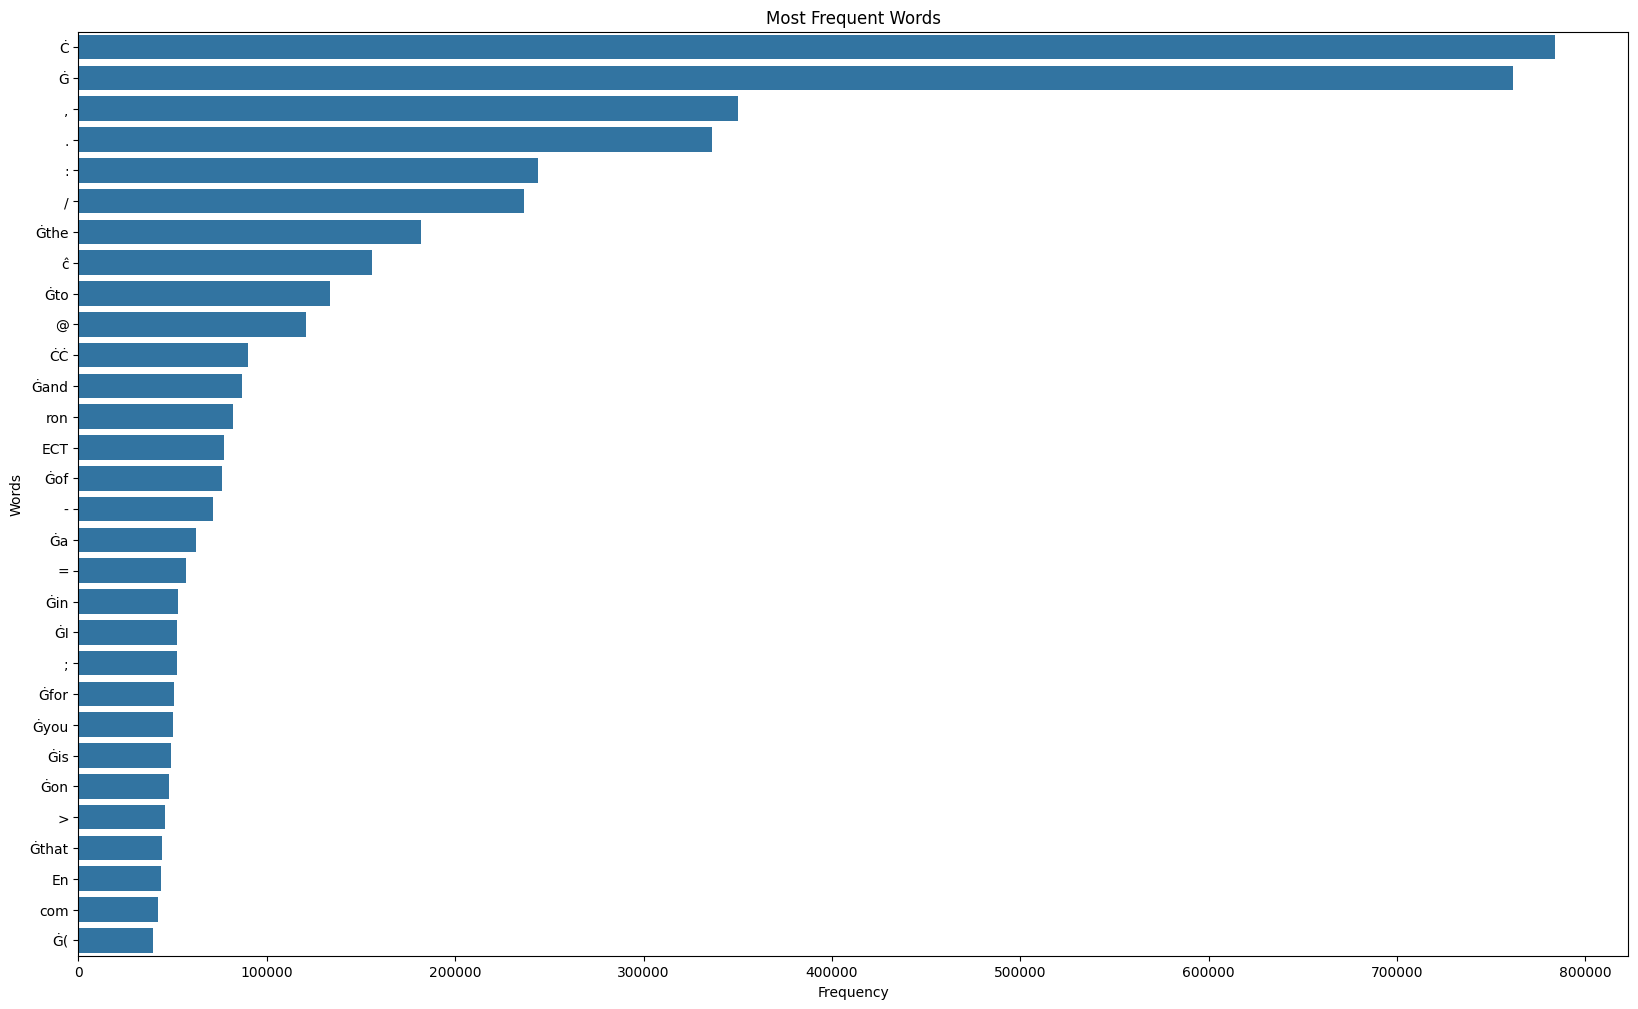

In [13]:
word_counts = Counter(all_tokens)

common_words_and_count = word_counts.most_common(30)

common_words = [entry[0] for entry in common_words_and_count]

words, counts = zip(*common_words_and_count)
plt.figure(figsize=(20, 12))
sns.barplot(x=list(counts), y=list(words))
plt.title("Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [14]:
common_words

['Ċ',
 'Ġ',
 ',',
 '.',
 ':',
 '/',
 'Ġthe',
 'ĉ',
 'Ġto',
 '@',
 'ĊĊ',
 'Ġand',
 'ron',
 'ECT',
 'Ġof',
 '-',
 'Ġa',
 '=',
 'Ġin',
 'ĠI',
 ';',
 'Ġfor',
 'Ġyou',
 'Ġis',
 'Ġon',
 '>',
 'Ġthat',
 'En',
 'com',
 'Ġ(']

In [15]:
merged_df.head()

,thread_id,subject,timestamp,from,to,body,summary,text_length,body_tokens,summary_tokens,subject_tokens
0,1,FW: Master Termination Log,1012303422000,"Gossett, Jeffrey C. JGOSSET","['Giron', 'Darron C. Dgiron', 'Love', 'Phillip...",\n\n -----Original Message-----\nFrom: =09Ther...,The email thread discusses the Master Terminat...,2756,"[ĊĊ, Ġ-----, Original, ĠMessage, -----, Ċ, Fro...","[The, Ġemail, Ġthread, Ġdiscusses, Ġthe, ĠMast...","[FW, :, ĠMaster, ĠTermin, ation, ĠLog]"
1,1,FW: Master Termination Log,1012481400000,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Gossett', 'Jeff...",\n\n -----Original Message-----\nFrom: =09Panu...,The email thread discusses the Master Terminat...,1941,"[ĊĊ, Ġ-----, Original, ĠMessage, -----, Ċ, Fro...","[The, Ġemail, Ġthread, Ġdiscusses, Ġthe, ĠMast...","[FW, :, ĠMaster, ĠTermin, ation, ĠLog]"
2,1,FW: Master Termination Log,1012921415000,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Anderson', 'Dia...",Note to Stephanie Panus....\n\nStephanie...ple...,The email thread discusses the Master Terminat...,2081,"[Note, Ġto, ĠStephanie, ĠPan, us, ...., Ċ, Ċ, ...","[The, Ġemail, Ġthread, Ġdiscusses, Ġthe, ĠMast...","[FW, :, ĠMaster, ĠTermin, ation, ĠLog]"
3,1,FW: Master Termination Log,1012921585000,"Theriot, Kim S. KTHERIO","['Hall', 'D. Todd Thall', 'Sweeney', 'Kevin Ks...",\n\n -----Original Message-----\nFrom: =09Panu...,The email thread discusses the Master Terminat...,1915,"[ĊĊ, Ġ-----, Original, ĠMessage, -----, Ċ, Fro...","[The, Ġemail, Ġthread, Ġdiscusses, Ġthe, ĠMast...","[FW, :, ĠMaster, ĠTermin, ation, ĠLog]"
4,1,FW: Master Termination Log,1022570435000,"Kelly, Katherine L. KKELLY","['Germany', 'Chris Cgerman']",\n\n -----Original Message-----\nFrom: =09McMi...,The email thread discusses the Master Terminat...,2249,"[ĊĊ, Ġ-----, Original, ĠMessage, -----, Ċ, Fro...","[The, Ġemail, Ġthread, Ġdiscusses, Ġthe, ĠMast...","[FW, :, ĠMaster, ĠTermin, ation, ĠLog]"


In [16]:
merged_df = merged_df.drop(columns=["thread_id", "timestamp", "from", "to"], axis = 1)

def preprocessing_pipeline(df, attribute, token_attribute):
    
        df[attribute] = df[attribute].str.lower()
        df[attribute] = df[attribute].apply(remove_special_chars)
        df[attribute] = df[attribute].apply(stem_words)
        df[token_attribute] = df[token_attribute].apply(remove_frequent_words)

        return df

In [17]:
merged_df = preprocessing_pipeline(merged_df, 'body', 'body_tokens')
merged_df = preprocessing_pipeline(merged_df, 'summary', 'summary_tokens')
merged_df = preprocessing_pipeline(merged_df, 'subject', 'subject_tokens')

# Fine tuning the model

In [18]:
merged_df.head()

,subject,body,summary,text_length,body_tokens,summary_tokens,subject_tokens
0,fw master termination log,original message from 09theriot...,the email thread discusses the master terminat...,2756,"[Ġ-----, Original, ĠMessage, -----, From, Ther...","[66, Ġmillion, Ġsettlement, Ġoffer, ĠStephanie...",[]
1,fw master termination log,original message from 09panus ...,the email thread discusses the master terminat...,1941,"[Ġ-----, Original, ĠMessage, -----, From, Pan,...","[66, Ġmillion, Ġsettlement, Ġoffer, ĠStephanie...",[]
2,fw master termination log,note to stephanie panus stephanie pleas...,the email thread discusses the master terminat...,2081,"[Note, Ġto, ...., ..., please, Ġremove, Ġmy, Ġ...","[66, Ġmillion, Ġsettlement, Ġoffer, ĠStephanie...",[]
3,fw master termination log,original message from 09panus ...,the email thread discusses the master terminat...,1915,"[Ġ-----, Original, ĠMessage, -----, From, Pan,...","[66, Ġmillion, Ġsettlement, Ġoffer, ĠStephanie...",[]
4,fw master termination log,original message from 09mcmicha...,the email thread discusses the master terminat...,2249,"[Ġ-----, Original, ĠMessage, -----, From, Mc, ...","[66, Ġmillion, Ġsettlement, Ġoffer, ĠStephanie...",[]


In [ ]:
import pandas as pd
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
import torch

MODEL_DIR = os.path.join(notebook_file_path, r"fine_tuned_bart")
RESULTS_DIR = os.path.join(notebook_file_path, r"results")
LOGS_DIR = os.path.join(notebook_file_path, r"logs")

# Combine subject and body for input
merged_df["input_text"] = merged_df["subject"] + ": " + merged_df["body"]
merged_df = merged_df[["input_text", "summary"]]

# Train-test split
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)
datasets = DatasetDict({"train": train_dataset, "test": test_dataset})

# Load BART tokenizer and model
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")

# Tokenize the datasets
def tokenize_function(examples):
    inputs = tokenizer(examples["input_text"], max_length=1024, truncation=True, padding="max_length")
    outputs = tokenizer(examples["summary"], max_length=128, truncation=True, padding="max_length")
    inputs["labels"] = outputs["input_ids"]
    return inputs

# Tokenize datasets
tokenized_datasets = datasets.map(tokenize_function, batched=True, remove_columns=datasets["train"].column_names)

# Define Trainer arguments
training_args = TrainingArguments(
    output_dir=RESULTS_DIR,
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_dir=LOGS_DIR,
    logging_steps=500,
)

# Data collator for padding
def data_collator(features):
    return {
        "input_ids": torch.tensor([f["input_ids"] for f in features]),
        "attention_mask": torch.tensor([f["attention_mask"] for f in features]),
        "labels": torch.tensor([f["labels"] for f in features]),
    }

# Trainer
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    rouge = datasets.load_metric("rouge")
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    return {key: value.mid.fmeasure for key, value in result.items()}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Save the fine-tuned model
trainer.save_model(MODEL_DIR)


Map: 100%|██████████| 4337/4337 [00:31<00:00, 139.09 examples/s]
c:\Users\97433\EmailSummarizer\.venv\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\97433\AppData\Local\Temp\ipykernel_35944\868574529.py:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
  0%|          | 3/13011 [16:09<1184:14:27, 327.74s/it]

In [129]:
!pip show accelerate

Name: accelerate
Version: 1.2.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: c:\Users\97433\EmailSummarizer\.venv\Lib\site-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 
